# Sorting Algorithm Experiment

## Executive Summary


The $O(n log n)$ sort algorithms have incredible bonuses compared to their $O(n^2)$ counterparts in the average case. In this experiment, we disect computation times for string sorts across five sorts: Selection Sort, Insertion Sort, Merge Sort, Quick Sort, and Heap Sort. Each algorithm was trialed 10 times across a range of values spanning 100 and 1200 length random strings. Particular attention was paid to a 200 step interval between 200,400,600,800,1000. 

### Results
###### Average Processing time in (ms)


|  Sorting Method 	|  Average Time Across All Array Sizes  in (ms)	|   	|   	|   	|
|---	|---	|---	|---	|---	|
|   insertion_sort	|35.122   	|   	|   	|   	|
|  total_qsort 	|  3.867 	|   	|   	|   	|
|   total_merge_sort	|  3.897 	|   	|   	|   	|
|   heap_sort	| 4.774  	|   	|   	|   	|
|   selection_sort	|    30.739	|   	|   	|   	|


The quick sort method was the fastest overall and never got above 4-5 miliseconds on nearly any of the trials across a linearly increased random array size to sort. It also appeared to be stable and had no big spikes in time consumption. 

All sorting algorithms maintained more comparable performance on smaller array sizes, but when scaling the array size, the selection sort and insertion sort rapidly increase. 


## Data Setup

In [28]:
import numpy as np
import pandas as pd
import time
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('bmh')
np.random.seed = 34 #set seed
LOG = {} # Define Log

def generate_random_string(size = 200):
    random_string = [''.join(random.choices(string.ascii_lowercase, k = 50)) for _ in range(size)]
    return random_string


## Timing mechanism
- The timing mechanism used in this experiment wraps functions and times their overall time to return function output. 
- A dictionary "LOG" is updated with the output times of the functions

In [29]:
def timeit(log):
    """ Wraps functions needing timing provided a dictionary to dump into based on function name"""
    def log_it(func):
        def wrapped(*args, **kw):
            ts = time.time_ns() // 1000000 
            result = func(*args, **kw)
            te = time.time_ns() // 1000000 
            if func.__name__ in log.keys():
                log[func.__name__].append(te-ts)
            else:
                log[func.__name__] = [te-ts]
            return result
        return wrapped
    return log_it



## Quick Sort Algorithm
As a comparison, I've optimized the quick sort algoirthm so that random pivots are used, greatly improving the average case. This algorithm is a good contrast to the selection sort as its average case is $O(n$ $log$ $n )$ but in the worst case it is the same as the selection sort $O(n^2)$.

The Quick Sort Algorithm works by using divide and conquer to recursively sort the algorithm left and right subsets based on a pivot point. The pivot point can be optimized further, but random pivot points have been shown to provide stable and reliable average case time-complexity runs. 

In [30]:
@timeit(LOG)
def total_qsort(arr):
    def qsort(arr):
        """
        Returns a sorted array. Time-complexity = O(n log n)
        Parameters
        ----------
            arr : list, array
                the array to sort
        """
        #Base case  (already sorted)
        if len(arr) < 2:
            return arr
        #Recursive case
        else:
            pivot = arr[np.random.randint(0,len(arr))]
            less = [i for i in arr[1:] if i <= pivot]
            greater = [i for i in arr[1:] if i > pivot]
            return qsort(less) + [pivot] + qsort(greater)
    return qsort(arr)

## Selection Sort Algorithm

The selection sort is a comparison type sort that operates in $O(n^2)$ time complexity. It iterates through the array checking for the smallest element and then replacing that smallest element to the front of the array. The algorithm repeats with the scope of the array shortened by one element (the first smallest detected element). The algorithm will repeat until there are no elements smaller than the last smallest element indicating the sort has completed. The reason this takes $n^2$ time is because the algorithm will go through n^2 iterations for the largest element in the list, and at least one iteration for even the smallest elements. This algorithm could be implemented recursively. 

In [31]:
@timeit(LOG)
def selection_sort(arr: list) -> list:
    """
    Returns a sorted array in O(n^2) time
    ----------
        arr : list, array
            the array to sort
    """
    for i in range(0, len(arr)-1):
        small = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[small]:
                small = j
        temp_i = arr[i]
        arr[i] = arr[small]
        arr[small] = temp_i
    return arr
    


## Insertion Sort

In [32]:
@timeit(LOG)
def insertion_sort(arr): 
    temp = arr.copy()
    # Traverse through 1 to len(arr) 
    for i in range(1, len(temp)): 
  
        key = temp[i] 
  
        # Move elements of arr[0..i-1], that are 
        # greater than key, to one position ahead 
        # of their current position 
        j = i-1
        while j >= 0 and key < temp[j] : 
                temp[j + 1] = temp[j] 
                j -= 1
        temp[j + 1] = key 
    return temp
  
  


## Heap Sort

In [33]:
def heapify(arr, n, i): 
    largest = i # Initialize largest as root 
    l = 2 * i + 1     # left = 2*i + 1 
    r = 2 * i + 2     # right = 2*i + 2 
  
    # See if left child of root exists and is 
    # greater than root 
    if l < n and arr[i] < arr[l]: 
        largest = l 
  
    # See if right child of root exists and is 
    # greater than root 
    if r < n and arr[largest] < arr[r]: 
        largest = r 
  
    # Change root, if needed 
    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i] # swap 
  
        # Heapify the root. 
        heapify(arr, n, largest) 

@timeit(LOG)
def heap_sort(arr): 
    temp = arr.copy()
    n = len(temp) 
  
    # Build a maxheap. 
    for i in range(n//2 - 1, -1, -1): 
        heapify(temp, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        temp[i], temp[0] = temp[0], temp[i] # swap 
        heapify(temp, i, 0) 
  

## Merge Sort

In [34]:
@timeit(LOG)
def total_merge_sort(arr):
    values = arr.copy()
    def merge_sort(values): 
        if len(values)>1: 
            m = len(values)//2
            left = values[:m] 
            right = values[m:] 
            left = merge_sort(left) 
            right = merge_sort(right) 

            values =[] 

            while len(left)>0 and len(right)>0: 
                if left[0]<right[0]: 
                    values.append(left[0]) 
                    left.pop(0) 
                else: 
                    values.append(right[0]) 
                    right.pop(0) 

            for i in left: 
                values.append(i) 
            for i in right: 
                values.append(i) 

        return values 
    return merge_sort(values)
  

## Experiment

Th experiment will be running the sorting algorithms at 200, 400, 600, 800, 1000 with 10 trials.

In [35]:
options = {'step':10, 'high':1200, 'low':200 }

def run_exp():
    for arr in [generate_random_string(i) for i in range(options['low'],options['high'], options['step'])]:
        insertion_sort(arr)
        total_qsort(arr)
        total_merge_sort(arr)
        heap_sort(arr)
        selection_sort(arr)
    return None

##### Running Experiment

In [36]:
N = 10

for experiment_run in range(N):
    run_exp()

##### Creating Labels for ran experiment

In [55]:
labels = [str(i) for i in range(options['low'],options['high'], options['step'])]
labels_expand = labels*N


##### Creating dataframe

In [38]:
df = pd.DataFrame(LOG)
df.head(10)
df['label'] = labels_expand

## Results
The 10 trials have been averaged controlling for array size to get a good picture of the time scaling wrt array length. 

Quick Sort, Heap Sort, and Merge sort exhibit properties of $O(nlogn)$ type divide and conquer sorting algorithms, while Insertion Sort and Selection Sort exhibit $O(n^2)$ properties as we vary array length.



All tiimes are in (ms). 

In [40]:
df_grouped = df.groupby('label').agg(np.mean)
df_grouped.head()

In [44]:
df_grouped.describe()

,insertion_sort,total_qsort,total_merge_sort,heap_sort,selection_sort
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,36.947000,4.065000,4.071000,4.855000,32.026000
std,27.681046,1.819056,1.965783,2.360679,23.306008
min,2.300000,1.200000,0.700000,0.900000,1.900000
25%,11.875000,2.475000,2.475000,2.900000,11.300000
50%,30.750000,4.050000,4.150000,4.850000,28.100000
75%,56.675000,5.550000,5.600000,7.000000,49.300000
max,99.600000,7.400000,7.800000,9.500000,84.600000


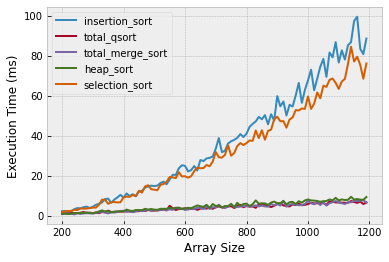

In [73]:
df_line = df.reset_index()
df_line['label'] = df_line['label'].astype(int)
df_line.drop('index', axis = 1, inplace = True)
df_line.groupby('label').agg(np.mean).plot()
plt.ylabel('Execution Time (ms)');
plt.xlabel('Array Size');

## Visualization

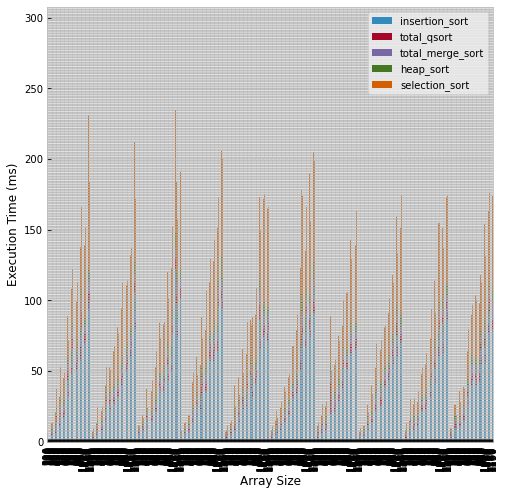

In [74]:
df = df.reset_index()
df = df.drop('index', axis = 1)
plot = df.plot.bar('label', stacked=True, figsize = (8,8))
plt.ylabel('Execution Time (ms)');
plt.xlabel('Array Size');

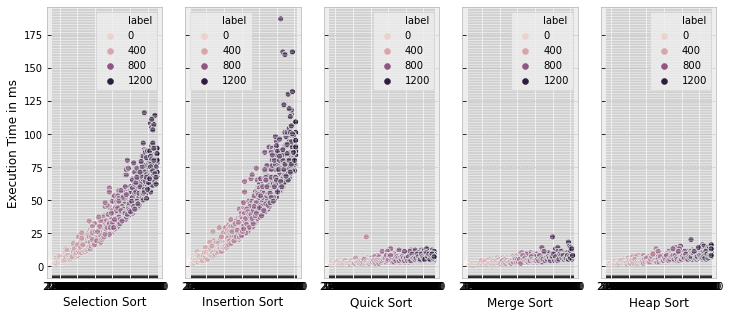

In [47]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (12,5), sharey=True)
ax1,ax2,ax3,ax4,ax5 = axes

sns.scatterplot(df['label'],df['selection_sort'], hue = df['label'], ax = ax1)
ax1.set_xlabel('Selection Sort')
ax1.set_ylabel('Execution Time in ms');
sns.scatterplot(df['label'],df['insertion_sort'], hue = df['label'], ax = ax2)
ax2.set_xlabel('Insertion Sort')
sns.scatterplot(df['label'],df['total_qsort'], hue = df['label'], ax = ax3)
ax3.set_xlabel('Quick Sort')
sns.scatterplot(df['label'],df['total_merge_sort'], hue = df['label'], ax = ax4)
ax4.set_xlabel('Merge Sort')
sns.scatterplot(df['label'],df['heap_sort'], hue = df['label'], ax = ax5)
ax5.set_xlabel('Heap Sort');




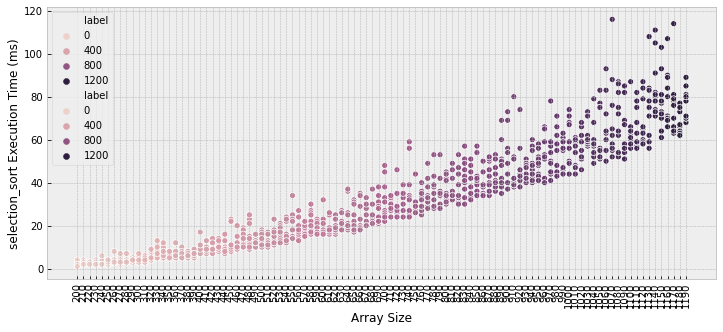

In [76]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,5))
sns.scatterplot(df['label'],df['selection_sort'], hue = df['label'], ax = ax)
sns.scatterplot(df['label'],df['selection_sort'], hue = df['label'], ax = ax)
plt.ylabel('selection_sort Execution Time (ms)')
plt.xticks(rotation=90);
plt.xlabel('Array Size');

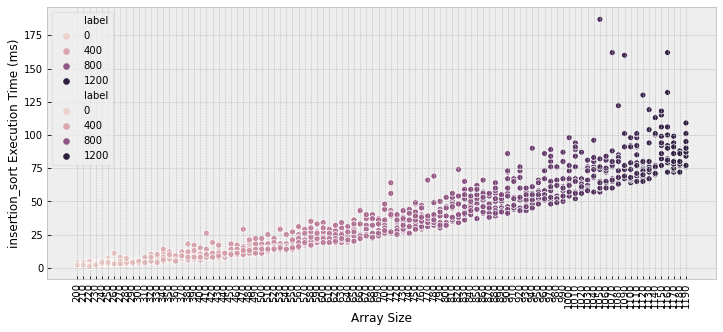

In [75]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,5))
sns.scatterplot(df['label'],df['insertion_sort'], hue = df['label'], ax = ax)
sns.scatterplot(df['label'],df['insertion_sort'], hue = df['label'], ax = ax)
plt.ylabel('insertion_sort Execution Time (ms)')
plt.xticks(rotation=90);
plt.xlabel('Array Size');

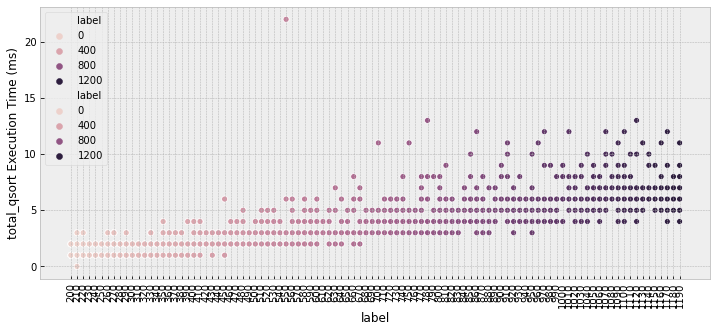

In [50]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,5))
sns.scatterplot(df['label'],df['total_qsort'], hue = df['label'], ax = ax)
sns.scatterplot(df['label'],df['total_qsort'], hue = df['label'], ax = ax)
plt.ylabel('total_qsort Execution Time (ms)')
plt.xticks(rotation=90);
plt.xlabel('Array Size');

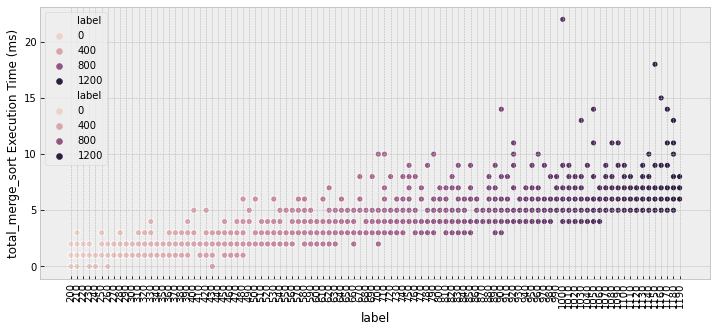

In [51]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,5))
sns.scatterplot(df['label'],df['total_merge_sort'], hue = df['label'], ax = ax)
sns.scatterplot(df['label'],df['total_merge_sort'], hue = df['label'], ax = ax)
plt.ylabel('total_merge_sort Execution Time (ms)')
plt.xticks(rotation=90);
plt.xlabel('Array Size');

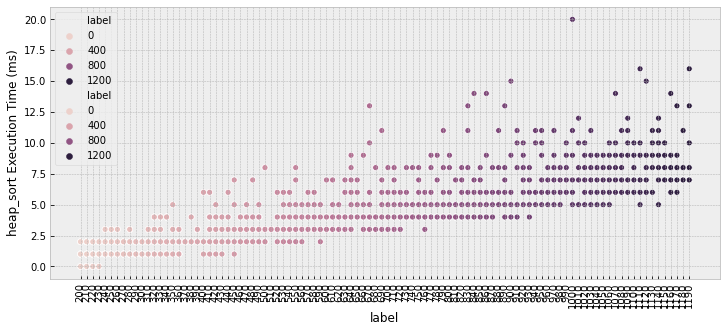

In [52]:

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,5))
sns.scatterplot(df['label'],df['heap_sort'], hue = df['label'], ax = ax)
sns.scatterplot(df['label'],df['heap_sort'], hue = df['label'], ax = ax)
plt.ylabel('heap_sort Execution Time (ms)')
plt.xticks(rotation=90);
plt.xlabel('Array Size');

Text(0, 0.5, 'Distribution Run Time')

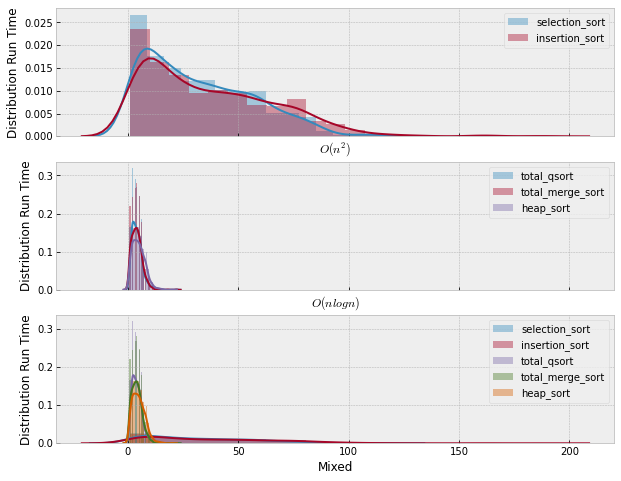

In [53]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8), sharex = True)
ax1, ax2,ax3 = axes.flatten()
sns.distplot(df['selection_sort'],label = 'selection_sort', ax = ax1)
sns.distplot(df['insertion_sort'], label = 'insertion_sort', ax = ax1)
ax1.legend()

ax1.set_xlabel('$O(n^2)$')
sns.distplot(df['total_qsort'],label = 'total_qsort', ax = ax2)
sns.distplot(df['total_merge_sort'],label = 'total_merge_sort',  ax = ax2)
sns.distplot(df['heap_sort'],label = 'heap_sort',  ax = ax2)
ax2.set_xlabel('$O(n log n)$')
ax2.legend()

sns.distplot(df['selection_sort'],label = 'selection_sort', ax = ax3)
sns.distplot(df['insertion_sort'], label = 'insertion_sort', ax = ax3)
sns.distplot(df['total_qsort'],label = 'total_qsort', ax = ax3)
sns.distplot(df['total_merge_sort'],label = 'total_merge_sort',  ax = ax3)
sns.distplot(df['heap_sort'],label = 'heap_sort',  ax = ax3)
ax3.legend()
ax3.set_xlabel('Mixed')

ax1.set_ylabel('Distribution Run Time')
ax2.set_ylabel('Distribution Run Time')
ax3.set_ylabel('Distribution Run Time')


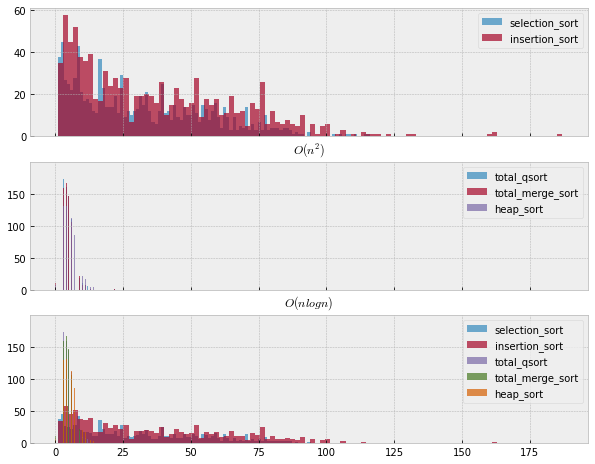

In [54]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8), sharex = True)
ax1, ax2,ax3 = axes.flatten()
ax1.hist(df['selection_sort'],label = 'selection_sort', bins = 100, alpha = .7)
ax1.hist(df['insertion_sort'], label = 'insertion_sort', bins = 100, alpha = .7)
ax1.legend()
ax1.set_xlabel('$O(n^2)$')

ax2.hist(df['total_qsort'],label = 'total_qsort', bins = 100, alpha = .7)
ax2.hist(df['total_merge_sort'],label = 'total_merge_sort', bins = 100, alpha = .7)
ax2.hist(df['heap_sort'],label = 'heap_sort', bins = 100, alpha = .7)
ax2.set_xlabel('$O(n log n)$')
ax2.legend()

ax3.hist(df['selection_sort'],label = 'selection_sort', bins = 100, alpha = .7)
ax3.hist(df['insertion_sort'], label = 'insertion_sort', bins = 100, alpha = .7)
ax3.hist(df['total_qsort'],label = 'total_qsort', bins = 100, alpha = .7)
ax3.hist(df['total_merge_sort'],label = 'total_merge_sort', bins = 100, alpha = .7)
ax3.hist(df['heap_sort'],label = 'heap_sort', bins = 100, alpha = .7)
ax3.legend()
